# Towards the Random Variable
## Recap

Sample Space $\Omega$ is the set of all possible outcomes of the experiment.  
An outcome $E \in \Omega$ is a proper subset of $\Omega$. This includes discrete elements. 

Loosely speaking the probability of the event $P(\omega)$ is the relative size of this set to the sample space: $P(E)=\frac{|E|}{|\Omega|}=\sum_{\omega \in E}P(\omega)$  

The pain we start to feel is that sets are hard to math on - we want to get to numbers so we can do math.  That's why we need:

## Random Variables
A random variable $X$ is a function mapping $\Omega$ to $\mathbb{R}$: $X: \Omega \mapsto \mathbb{R}$.  
Intuitively, so far any $E \in \Omega$ the random variable is a function, $f(E)$ which returns a real number.  There's fiddly detail, but this is the gist. 

So lets play with it, by rolling dice.  The roll of the die is the random event, and the outcome of gambling function in the random variable (RV).

In [1]:
import random as r
import itertools as i
import numpy as np
import matplotlib.pyplot as plt
from math import comb

In [2]:
# Generic sampling function, The idea here is to use python's sampling instead of trying to get it right
# ourselves.   Important later as sampling can be very hard indeed.

# A random event - a sample from my set.  
def easy_sample(sample_space, num_samples=1):
    if num_samples==1:
        return r.choices(sample_space, k=1)[0]           # watchout, r.sample is NOT what we want WHY
    else:
        return r.choices(sample_space, k=num_samples)


In [3]:
# Adlibbing always leads to pain, but lets do it anyway
# Non-numerical sample space
coin = ["H", "T"]

def heads_i_win(c):
    if c=="H":
        return 1000
    else:
        return -1000

[heads_i_win(c) for c in r.choices(coin, k=10)]

[1000, -1000, 1000, 1000, 1000, -1000, 1000, -1000, 1000, -1000]

In [4]:
# Specialize to rolling a die

# The sample space
single_die = [1,2,3,4,5,6]

# A series of random events
def roll_die(n=1):
    return easy_sample(single_die, n)

roll_die(6)

[5, 3, 5, 4, 6, 4]

In [5]:
# Basic RVs
def face_value(r):
    return r

def square_of_face(r):
    return r*r

def silly_rv(r):
    return r+r/3

#[face_value(r) for r in roll_die(10)]

rs = roll_die(10)
print(rs)

[square_of_face(r) for r in rs]

[4, 2, 4, 3, 2, 1, 6, 6, 5, 6]


[16, 4, 16, 9, 4, 1, 36, 36, 25, 36]

In [6]:
# Gambling - the payoff is the random variable X
def gamble(n):     # Its just a function
    if n==2:
        return 1000
    else:
        return -100

[gamble(r) for r in roll_die(10)]

[-100, -100, 1000, -100, -100, 1000, -100, 1000, -100, -100]

# Two dice game

In [7]:
# First lets define the sample space, which may not be how we usually think about this
dice = list(i.product(single_die, single_die))
dice

[(1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (3, 5),
 (3, 6),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 4),
 (4, 5),
 (4, 6),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 5),
 (5, 6),
 (6, 1),
 (6, 2),
 (6, 3),
 (6, 4),
 (6, 5),
 (6, 6)]

In [8]:
# Now sample from the space
def roll_dice(n=1):
    return easy_sample(dice, n)

roll_dice(3)

[(5, 4), (3, 6), (5, 3)]

In [9]:
def max_dice(dice):
    a, b = dice
    return max(dice)

# RV on a double roll - note how it goes from a complex thing to a number in R
def gamble2(dice):
    a, b = dice
    if a+b>=4:
        return 1000
    else:
        return -100
    
[gamble2(r) for r in roll_dice(10)]

[1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]

# Distributions

Up to this point we have been sampling, but it becomes cumbersome to deal with 1000 samples, and not super informative.  So we need to start summarizing: enter distributions and statistics

## Probability Mass Function
In the discrete case, for RV $X$, the probability mass function (pmf for short) is defined as $$P(X=a)$$ which is shortened to $p_X(a)$ and even $p(a)$ when context is clear but means the same thing.  It reads "the probability that X equals a", as such $0 \le p(a) \le 1$.

Note that probabilities are defined on events to $X=a$ means the event $\{\omega | X(\omega)=a  \}$.

We know that we calculate probabilities by relative sizes of sets, so lets do that explicitly

In [10]:
def pmf(sample_space, random_variable_function):    
    # Apply the random variable function to the sample space
    transformed_values = [random_variable_function(s) for s in sample_space]
    
    # Count the frequency of each value
    value_counts = {}
    for value in transformed_values:
        if value in value_counts:
            value_counts[value] += 1
        else:
            value_counts[value] = 1
    
    # Calculate the PMF
    total_elements = len(sample_space)
    pmf_dict = {k: v / total_elements for k, v in value_counts.items()}
    
    return pmf_dict

#
#pmf(single_die, face_value)
pmf(dice, gamble2)
pmf(coin, heads_i_win)

{1000: 0.5, -1000: 0.5}

## Cumulative Distribution Function (CDF)
This is literally just the running sum (cumulant) of the PMF.
$$ F(a) = P(X\le a)$$

In [11]:
def cdf(pmf):
    sorted_items = sorted(pmf.items())
    cumulative_probability = 0
    cdf_dict = {}

    for value, probability in sorted_items:
        cumulative_probability += probability
        cdf_dict[value] = cumulative_probability

    return cdf_dict

cdf(pmf(single_die, face_value))
#cdf(pmf(dice, gamble2))


{1: 0.16666666666666666,
 2: 0.3333333333333333,
 3: 0.5,
 4: 0.6666666666666666,
 5: 0.8333333333333333,
 6: 0.9999999999999999}

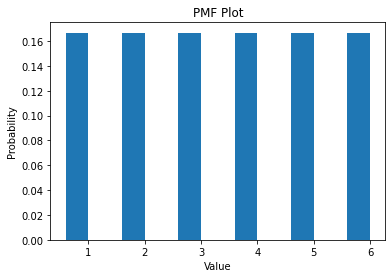

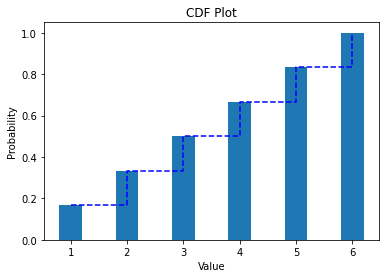

In [12]:
def plot_distribution(data_dict, distribution_type="pmf"):
    # Ensure valid distribution type
    if distribution_type not in ["pmf", "cdf"]:
        raise ValueError("distribution_type must be either 'pmf' or 'cdf'")
    
    # Sort the data for plotting
    sorted_items = sorted(data_dict.items())
    x, y = zip(*sorted_items)
    
    # Plot based on distribution type
    plt.bar(x, y, width=-0.4, align='edge' if distribution_type == "pmf" else 'center')
    plt.xlabel('Value')
    plt.ylabel('Probability')
    plt.title(f'{distribution_type.upper()} Plot')
    
    if distribution_type == "cdf":
        plt.step(x, y, where='post', color='blue', linestyle='dashed')

    plt.show()

# Example usage:
pmf_example = pmf(single_die, face_value)
cdf_example = cdf(pmf_example)

plot_distribution(pmf_example, "pmf")  # plots PMF
plot_distribution(cdf_example, "cdf")  # plots CDF


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_pretty_distribution(data, title="Pretty Distribution", color="royalblue"):
    """
    Plots a pretty histogram with KDE.
    
    Args:
    - data (list or np.array): The data points to plot
    - title (str): The title of the plot
    - color (str): Color for the plot elements
    
    Returns:
    None
    """
    
    # Set the aesthetics for the plot
    sns.set_style("whitegrid")
    sns.despine(left=True)
    
    # Create the histogram with KDE
    sns.histplot(data, kde=True, color=color, bins=30)
    
    plt.title(title, fontsize=16)
    plt.xlabel("Value", fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    plt.tight_layout()
    plt.show()


#data = np.random.randn(1000)  # Random data from a normal distribution 
#plot_pretty_distribution(data, "Normal Distribution")

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_pretty_distribution(data, title="Pretty Distribution", color="royalblue"):
    """
    Plots a pretty histogram with KDE.
    
    Args:
    - data (list or np.array): The data points to plot
    - title (str): The title of the plot
    - color (str): Color for the plot elements
    
    Returns:
    None
    """
    
    # Set the aesthetics for the plot
    sns.set_style("whitegrid")
    sns.despine(left=True)
    
    # Create the histogram with KDE
    sns.histplot(data, kde=True, color=color, bins=30, kde_kws={"shade": True})
    
    plt.title(title, fontsize=16)
    plt.xlabel("Value", fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    plt.tight_layout()
    plt.show()

# Example Usage:
# data = np.random.randn(1000)  # Random data from a normal distribution
# plot_pretty_distribution(data, "Normal Distribution")

# Distribution Zoo
Now that we know what distributions are, lets look at some famous and useful examples.

## Bernoulli Distribution
This is the distribution of win/loss with a certain probability, over a *single* event.  

$$ X \in \{0, 1\}$$   

and  

$$P(X=1) = p, P(X=0) = 1-p$$ 

Think drawing from an urn, flipping a coint etc.   Lets see it:

{0: 0.010000000000000009, 1: 0.99}


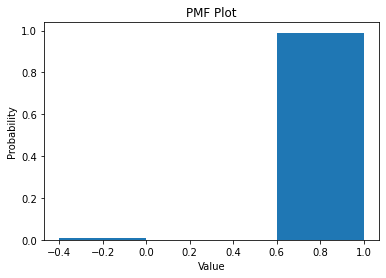

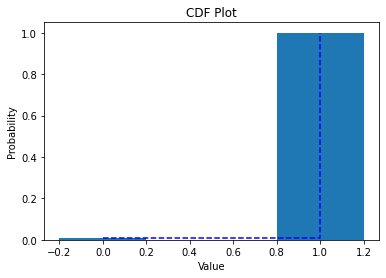

In [15]:
# Bernoulli
def pmf_ber(p):
    return {0:(1-p), 1:p}

d = pmf_ber(0.99)
print(d)
plot_distribution(d, "pmf")  # plots PMF
plot_distribution(cdf(d), "cdf")  # plots CDF

In [16]:
# Heads are success, Tails are failure
# P(H) = 0.7
# Probability of the sequence "TTH" is 0.3 * 0.3 * 0.7 = (1-p)^(n-k) * p ^ k
# and the probability of "THT" is 0.3 * 0.7 * 0.3
# "HTT" also 0.7 * 0.3 * 0.3

## Binomial

$X \sim Bin(n, p)$ is probability of $k$ successes in $n$ sequential Bernoulli experiments, each with probability $p$ of success.  
$$ X \sim Bin(n,p) \implies P(X=k) = {n \choose k}p^k(1-p)^{(n-k)}$$

We know this because each of the $k$ 'success' happens with independent probability $k$, and the $(n-k)$ failures with probability $1-p$.  They're Bernoullis, remember.  So this is th probabilitiy for any n length sequence of k success, and there are many permutations.  But we don't care about order, just number, so we want combinations. From last week we know that there an ${n \choose k}$ combinations of such sequences.  So we need to multiply the probability of any individual sequence of $k$ success with the total number of such.

If tails are 'success' then these sequences are the same as far as Binomal is concerned TTH, THT, HTT 

In [37]:
dict(zip(['k1', 'k2', 'k3'], ['v1', 'v2', 'v3']))

{'k1': 'v1', 'k2': 'v2', 'k3': 'v3'}

{0: 9.5367431640625e-07, 1: 1.9073486328125e-05, 2: 0.0001811981201171875, 3: 0.001087188720703125, 4: 0.004620552062988281, 5: 0.0147857666015625, 6: 0.03696441650390625, 7: 0.0739288330078125, 8: 0.12013435363769531, 9: 0.16017913818359375, 10: 0.17619705200195312, 11: 0.16017913818359375, 12: 0.12013435363769531, 13: 0.0739288330078125, 14: 0.03696441650390625, 15: 0.0147857666015625, 16: 0.004620552062988281, 17: 0.001087188720703125, 18: 0.0001811981201171875, 19: 1.9073486328125e-05, 20: 9.5367431640625e-07}


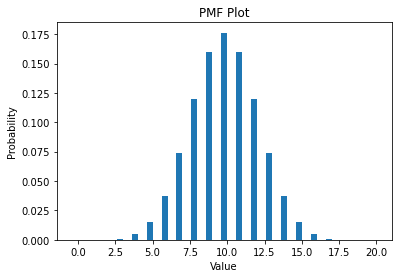

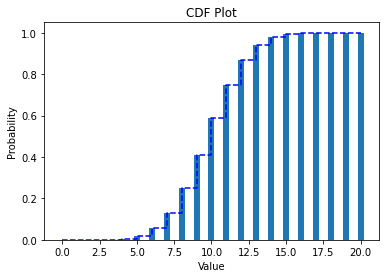

In [36]:
# Binomial
def pmf_bin(n, p):
    ks = range(0, n+1)
    return dict(list(zip(ks, [comb(n, k)*p**(k)*(1-p)**(n-k) for k in ks])))

d = pmf_bin(20, 0.5)
print(d)
plot_distribution(d, "pmf")  # plots PMF
plot_distribution(cdf(d), "cdf")  # plots CDF

In [19]:
d

{0: 9.5367431640625e-07,
 1: 1.9073486328125e-05,
 2: 0.0001811981201171875,
 3: 0.001087188720703125,
 4: 0.004620552062988281,
 5: 0.0147857666015625,
 6: 0.03696441650390625,
 7: 0.0739288330078125,
 8: 0.12013435363769531,
 9: 0.16017913818359375,
 10: 0.17619705200195312,
 11: 0.16017913818359375,
 12: 0.12013435363769531,
 13: 0.0739288330078125,
 14: 0.03696441650390625,
 15: 0.0147857666015625,
 16: 0.004620552062988281,
 17: 0.001087188720703125,
 18: 0.0001811981201171875,
 19: 1.9073486328125e-05,
 20: 9.5367431640625e-07}

## Geometric Distribution
$P(X=k) \sim geo(p)$ represents the probability of $k$ sequential failures in a sequence of Bernoulli trials before the first success.  That is the distribution length of the runs of failure.   Here order matters, and there's only one way to get such a sequence, so the pmf comes out as.  

$$
X\sim geo(p) \implies P(X=k) = (1-p)^{k}p
$$


If tails are 'success' then these sequences are not the same as far as Binomal is concerned TTH, THT, HTT, HHT, HHHHHT etc.

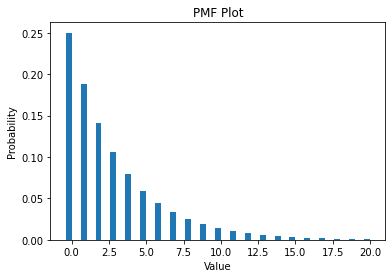

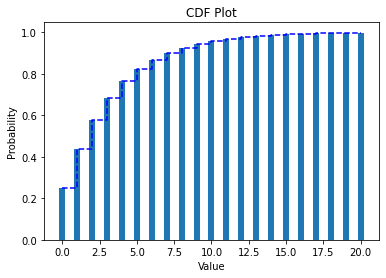

{0: 0.25,
 1: 0.1875,
 2: 0.140625,
 3: 0.10546875,
 4: 0.0791015625,
 5: 0.059326171875,
 6: 0.04449462890625,
 7: 0.0333709716796875,
 8: 0.025028228759765625,
 9: 0.01877117156982422,
 10: 0.014078378677368164,
 11: 0.010558784008026123,
 12: 0.007919088006019592,
 13: 0.005939316004514694,
 14: 0.004454487003386021,
 15: 0.0033408652525395155,
 16: 0.0025056489394046366,
 17: 0.0018792367045534775,
 18: 0.001409427528415108,
 19: 0.001057070646311331,
 20: 0.0007928029847334983}

In [38]:
# Geomotric
def pmf_geom(p, n=10):
    ks = range(0, n+1)
    return dict(zip(ks, [p*(1-p)**(k) for k in ks]))

d = pmf_geom(0.25, n=20)
plot_distribution(d, "pmf")  # plots PMF
plot_distribution(cdf(d), "cdf")  # plots CDF
d

## Uniform Distribution
The distribution over equally likely events.  Useful to express ignorance or lack of preference.
$$X\sim\textrm{uniform(N)} \implies P(X=k)=1/N$$

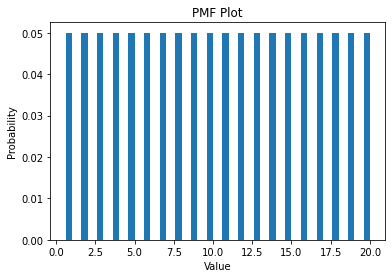

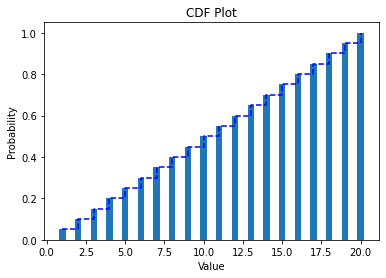

In [21]:
# Uniform
def pmf_unif(n):
    ks = range(1, n+1)
    return dict(zip(ks, [1/n for k in ks]))

d = pmf_unif(20)
plot_distribution(d, "pmf")  # plots PMF
plot_distribution(cdf(d), "cdf")  # plots CDF